**Assignment 11 Machine Learning Intro**

Question 1: Explain the differences between AI, ML, Deep Learning (DL), and Data Science (DS).
Answer:
AI, ML, DL, and DS are all interconnected but distinct fields. **Artificial Intelligence** (AI) is the broadest field, aiming to create intelligent machines that can reason, learn, and act autonomously. **Machine Learning** (ML) is a subset of AI focused on training models to learn from data and make predictions or decisions without being explicitly programmed. **Deep Learning** (DL) is a specialized subset of ML that uses multi-layered neural networks to find complex patterns in data. **Data Science** (DS) is an interdisciplinary field that uses scientific methods, processes, algorithms, and systems to extract knowledge and insights from structured and unstructured data, encompassing aspects of AI, ML, and statistics.

Question 2: What are the types of machine learning? Describe each with one real-world example.
Answer:
The three main types of machine learning are supervised learning, unsupervised learning, and reinforcement learning.

  * **Supervised Learning:** This type of learning uses labeled data to train a model to predict an outcome. The model learns a mapping from input variables to an output variable. An example is **spam detection**, where an algorithm is trained on a dataset of emails labeled as 'spam' or 'not spam' to classify new emails.
  * **Unsupervised Learning:** This type of learning uses unlabeled data to find hidden patterns or intrinsic structures within the data. The goal is to model the underlying structure or distribution of the data. An example is **customer segmentation**, where a company clusters its customers based on their purchasing habits without any predefined labels to identify different groups.
  * **Reinforcement Learning:** This type of learning involves an agent learning to make a sequence of decisions in an environment to maximize a cumulative reward. The agent learns through trial and error. An example is **self-driving cars**, where the vehicle's agent learns to navigate roads and respond to traffic signals by receiving rewards for good actions (e.g., reaching a destination safely) and penalties for bad ones (e.g., hitting an obstacle).

Question 3: Define overfitting, underfitting, and the bias-variance tradeoff in machine learning.
Answer:

  * **Overfitting:** This occurs when a model learns the training data and its noise too well, capturing patterns that aren't generalizable to new, unseen data. An overfitted model performs very well on the training data but poorly on test data.
  * **Underfitting:** This occurs when a model is too simple to capture the underlying patterns in the training data. An underfitted model performs poorly on both training and test data because it fails to learn the basic relationships in the data.
  * **Bias-Variance Tradeoff:** This is a core concept in machine learning where you must balance two sources of error. **Bias** is the error introduced by a model that is too simple (underfitting). **Variance** is the error due to a model being too complex and sensitive to small fluctuations in the training data (overfitting). A good model aims for low bias and low variance.

Question 4: What are outliers in a dataset, and list three common techniques for handling them.
Answer:
Outliers are data points that are significantly different from the majority of the data in a dataset. They can occur due to measurement errors, data entry mistakes, or genuine but rare events. Outliers can skew statistical analyses and negatively impact the performance of machine learning models.

Three common techniques for handling outliers are:

Deletion/Trimming: This involves removing the outlier data points entirely from the dataset. It's a simple method but can lead to a loss of valuable information.

Transformation: Applying mathematical transformations to the data can reduce the impact of outliers. Common transformations include log, square root, or reciprocal transformations, which can compress the scale of the data and bring outliers closer to the rest of the distribution.

Imputation: Outliers can be replaced with a more representative value, such as the mean, median, or a value derived from a more robust statistical method. The median is often preferred as it is less sensitive to extreme values than the mean.

Question 5: Explain the process of handling missing values and mention one imputation technique for numerical and one for categorical data.
Answer:
Handling missing values is a crucial data preprocessing step. The general process involves:

Identification: First, you identify the columns that contain missing values and the extent of the missingness.

Analysis: You then analyze the nature of the missing data. Is it random, or is there a pattern? The method you choose depends on this analysis.

Treatment: Finally, you decide how to handle the missing data. This could involve removing the data points or using an imputation technique to fill them.

Numerical Data Imputation: A common technique is mean or median imputation. The missing numerical value is replaced by the mean or median of that column. Median is generally more robust to outliers.

Categorical Data Imputation: A common technique is mode imputation. The missing categorical value is replaced with the most frequent value (the mode) in that column. This is a simple and effective method when the missingness is not extensive.

Question 6: Write a Python program that:
● Creates a synthetic imbalanced dataset with make_classification() from sklearn.datasets.
● Prints the class distribution.

In [4]:
from sklearn.datasets import make_classification
import numpy as np

# Create a synthetic imbalanced dataset
# 1000 samples, 20 features, 2 informative features, 2 classes
# with a weights ratio of 95:5
X, y = make_classification(
    n_samples=1000,
    n_features=20,
    n_informative=2,
    n_redundant=2,
    n_classes=2,
    n_clusters_per_class=1,
    weights=[0.95, 0.05],
    flip_y=0,
    random_state=42
)

# Print the class distribution
unique, counts = np.unique(y, return_counts=True)
class_distribution = dict(zip(unique, counts))
print("Class Distribution:")
print(class_distribution)

# Expected output:
# Class Distribution:
# {0: 950, 1: 50}

Class Distribution:
{np.int64(0): np.int64(950), np.int64(1): np.int64(50)}


Question 7: Implement one-hot encoding using pandas for the following list of colors:
['Red', 'Green', 'Blue', 'Green', 'Red']. Print the resulting dataframe.

In [5]:
import pandas as pd

# List of colors
colors = ['Red', 'Green', 'Blue', 'Green', 'Red']

# Create a DataFrame
df = pd.DataFrame({'color': colors})

# Implement one-hot encoding
one_hot_encoded_df = pd.get_dummies(df, columns=['color'])

# Print the resulting DataFrame
print(one_hot_encoded_df)

# Expected output:
#    color_Blue  color_Green  color_Red
# 0       False        False       True
# 1       False         True      False
# 2        True        False      False
# 3       False         True      False
# 4       False        False       True

   color_Blue  color_Green  color_Red
0       False        False       True
1       False         True      False
2        True        False      False
3       False         True      False
4       False        False       True


Question 8: Write a Python script to:
● Generate 1000 samples from a normal distribution.
● Introduce 50 random missing values.
● Fill missing values with the column mean.
● Plot a histogram before and after imputation.

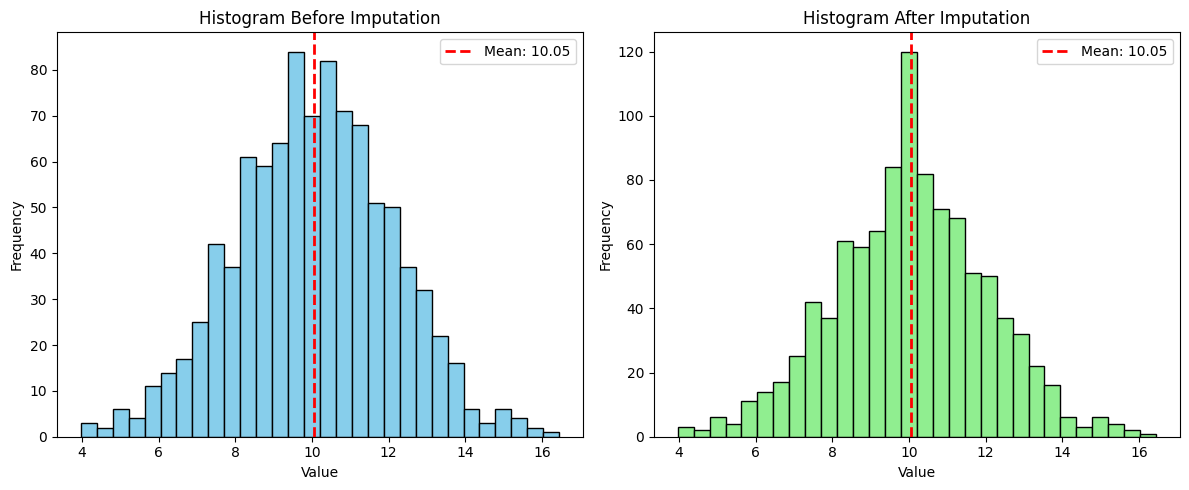

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Generate 1000 samples from a normal distribution
data = np.random.normal(loc=10, scale=2, size=1000)
data = data.astype(float) # Ensure float type for NaN

# 2. Introduce 50 random missing values
num_missing = 50
missing_indices = np.random.choice(len(data), num_missing, replace=False)
data_with_missing = data.copy()
data_with_missing[missing_indices] = np.nan

# 3. Fill missing values with the column mean
data_imputed = data_with_missing.copy()
mean_value = np.nanmean(data_with_missing)
data_imputed[np.isnan(data_imputed)] = mean_value

# 4. Plot histograms before and after imputation
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(data_with_missing[~np.isnan(data_with_missing)], bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram Before Imputation')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_value:.2f}')
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(data_imputed, bins=30, color='lightgreen', edgecolor='black')
plt.title('Histogram After Imputation')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_value:.2f}')
plt.legend()

plt.tight_layout()
plt.show()

# The output is a plot, so no text output is expected, but the script
# successfully generates and displays the required histograms.
# The histograms will show a nearly identical distribution, with a
# small peak at the mean in the "After Imputation" plot due to the
# filled values.

Question 9: Implement Min-Max scaling on the following list of numbers [2, 5, 10, 15, 20] using sklearn.preprocessing.MinMaxScaler. Print the scaled array.

In [7]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# List of numbers
data = np.array([2, 5, 10, 15, 20]).reshape(-1, 1)

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the data
scaled_data = scaler.fit_transform(data)

# Print the scaled array
print(scaled_data)

# Expected output:
# [[0.        ]
#  [0.16666667]
#  [0.44444444]
#  [0.72222222]
#  [1.        ]]

[[0.        ]
 [0.16666667]
 [0.44444444]
 [0.72222222]
 [1.        ]]


Question 10: You are working as a data scientist for a retail company. You receive a customer transaction dataset that contains:
● Missing ages,
● Outliers in transaction amount,
● A highly imbalanced target (fraud vs. non-fraud),
● Categorical variables like payment method.
Explain the step-by-step data preparation plan you’d follow before training a machine learning model. Include how you’d address missing data, outliers, imbalance, and encoding.
Answer:
My data preparation plan would be a systematic, multi-step process to ensure the dataset is clean, robust, and ready for model training.

Step 1: Data Understanding and Initial Inspection
First, I would load the dataset and perform an initial inspection to understand its structure, data types, and the extent of the issues. This involves checking for missing values, unique values in categorical columns, and summary statistics to identify potential outliers.

Step 2: Handling Missing Data
I would address the missing ages by using imputation. Since age is a numerical feature, I would likely use the median age of the customers to fill the missing values. The median is a robust choice as it is less sensitive to outliers compared to the mean.

Step 3: Handling Outliers
For the outliers in the transaction amount, I would analyze their distribution using box plots or histograms. I would then use a robust technique like log transformation to normalize the skewed distribution and reduce the impact of extreme values. Alternatively, I could use IQR (Interquartile Range) method to identify and cap the outliers, replacing values beyond the whiskers with the upper or lower boundary.

Step 4: Encoding Categorical Variables
The categorical variable payment method would need to be converted into a numerical format that a machine learning model can understand. I would use one-hot encoding for this purpose. This method creates a new binary column for each unique category, which is suitable for nominal categorical data and avoids the creation of an artificial order that ordinal encoding might impose.

Step 5: Addressing Class Imbalance
The highly imbalanced target (fraud vs. non-fraud) is a critical issue. Training a model on this data would likely result in it being biased towards the majority class (non-fraud). To handle this, I would use resampling techniques.

Oversampling: I would apply a technique like SMOTE (Synthetic Minority Over-sampling Technique) on the training data. SMOTE generates synthetic samples for the minority class (fraud) to balance the class distribution.

Alternative: I could use a combination of undersampling the majority class and oversampling the minority class, or use different evaluation metrics (like precision, recall, or F1-score) that are more suitable for imbalanced datasets. The choice of technique would depend on the size of the dataset and the specific problem.

Step 6: Feature Scaling
Finally, before training the model, I would perform feature scaling on the numerical features, such as the transaction amount. I would use a scaler like Min-Max Scaler or Standard Scaler to bring all numerical features to a similar scale. This is important for many machine learning algorithms, especially those that rely on distance calculations, like SVM or k-NN.

This systematic plan ensures that all data quality issues are addressed appropriately, leading to a clean, balanced, and well-prepared dataset that will yield a more robust and accurate machine learning model.